<a href="https://colab.research.google.com/github/Acabre21/machineLearning/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1:

In [0]:
import numpy as np
import random as random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# w - weight
# b - bias
# mu - mean
# sigma - std dev
# m - size
def get_random_data(w, b, mu, sigma, m):
  data = np.zeros((m,2))
  labels = np.zeros((m,1))
  
  # populating the arrays
  for i in range(0,m):
    # 50/50 chance of a 1 or a 0
    c = np.random.uniform(0,1)
    if c > 0.5:
      c = 1
    else:
      c = 0

    # initializing the features
    x1 = np.random.uniform()
    n = np.random.normal(mu,sigma)
    x2 = w * x1 + b + (-1)**c * n

    data[i][0] = x1
    data[i][1] = x2
    labels[i] = c
  
  return data, labels 

In [0]:
def display_random_data(data, labels):
  mpl.rc('axes', labelsize=14)
  mpl.rc('xtick', labelsize=12)
  mpl.rc('ytick', labelsize=12)

  # plotting a red point when the label is 1 and blue for 0
  for i in range(0,len(data)):
    if labels[i] == 1:
      plt.plot(data[i][0], data[i][1], "r.")
    else:
      plt.plot(data[i][0], data[i][1], "b.") 

  plt.axis([0, 1, -15, 15])
  plt.show()

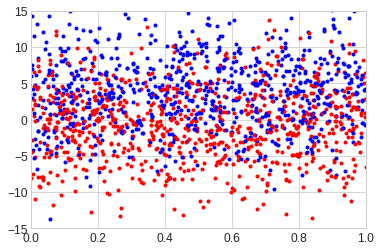

In [0]:
data, labels = get_random_data(4,2,2,25,2000)
trainingData = data[:1600]
trainingLabels = labels[:1600]
testingData = data[400:]
testingLabels = labels[400:]
display_random_data(trainingData, trainingLabels)

Problems 2 & 3:

In [0]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

# adding the layer to the model
model = models.Sequential()
denseLayer = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2, ))
model.add(denseLayer)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# training the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['accuracy'], loss='binary_crossentropy')
model.fit(trainingData, trainingLabels, epochs=100, batch_size=8, validation_data=(testingData, testingLabels))

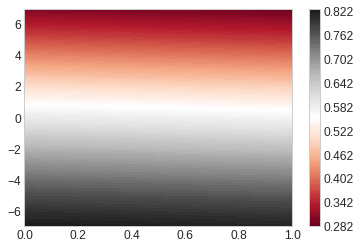

In [0]:
# creating a heatmap to find the bias line
x = np.linspace(0, 1, 100)
y = np.linspace(-7, 7, 100)

X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

Z = model.predict(np.column_stack((X, Y)))
Z = Z.flatten()

plt.tricontourf(X, Y, Z, 100, cmap='RdGy')
plt.colorbar();

In [0]:
weights = model.get_weights()
w1 = weights[0][0][0]
w2 = weights[0][1][0]
weightLine = -w1 / w2

bias = weights[1][0] 
biasLine = -bias / w2 

[array([[-0.06844286],
        [-0.17218532]], dtype=float32), array([0.36360872], dtype=float32)]